Analyse a Tract's CoaddPsf

In [1]:
import numpy as np
import lsst.pipe.base as pipeBase
import lsst.daf.persistence as dafPersist
import lsst.pex.exceptions as pexExcept
import lsst.afw.geom as afwGeom
import lsst.afw.image as afwImage
import lsst.afw.table as afwTable
import lsst.afw.display.ds9 as ds9

%matplotlib inline
import matplotlib.pyplot as plt

In [136]:
def makeKey(patch, myVisit=None, keys=[]):
    """Return the key used to lookup data for a patch and maybe visit
    
    If keys is provided then a key present in keys is returned (if it exists) with 
    the requested key as a prefix.    
    """
    key = str(patch)
    if myVisit and True:
        key += '-%d' % myVisit
        
    if keys and key not in keys:
        for k in keys:
            if k.startswith(key):
                return k
        
    return key

def drawPatches(calexpInfo, patches):
    """Overlay a matplotlib image with labelled patch numbers"""
    for patch in patches:
        key = makeKey(patch, keys=calexpInfo.keys())
        
        bbox = calexpInfo[key].bbox
        wcs  = calexpInfo[key].wcs

        ra = []; dec = []
        for xy in bbox.getMin(), bbox.getMax():
            rd = [_.asDegrees() for _ in wcs.pixelToSky(*xy)]
            ra.append(rd[0]); dec.append(rd[1])
        ra =  np.array([ra[0],  ra[1],  ra[1],  ra[0],  ra[0]])
        dec = np.array([dec[0], dec[0], dec[1], dec[1], dec[0]])

        rabar, decbar = np.mean(ra[0:-1]), np.mean(dec[0:-1])
        if True:
            if rabar < plt.xlim()[0] or rabar > plt.xlim()[1] or \
               decbar < plt.ylim()[0] or decbar > plt.ylim()[1]:
                continue

        plt.plot(ra, dec, '-', color='black')
        plt.text(rabar, decbar, patch,
                 horizontalalignment='center', verticalalignment='center')
        
def drawCcds(calexpInfo, ccds):
    """Overlay a matplotlib image with labelled CCD numbers"""
    for ccd in ccds:
        key = makeKey(ccd, myVisit, keys=calexpInfo.keys())
        
        bbox = calexpInfo[key].bbox
        wcs  = calexpInfo[key].wcs

        ra = []; dec = []
        for xy in bbox.getMin(), bbox.getMax():
            rd = [_.asDegrees() for _ in wcs.pixelToSky(*xy)]
            ra.append(rd[0]); dec.append(rd[1])
        ra =  np.array([ra[0],  ra[1],  ra[1],  ra[0],  ra[0]])
        dec = np.array([dec[0], dec[0], dec[1], dec[1], dec[0]])

        rabar, decbar = np.mean(ra[0:-1]), np.mean(dec[0:-1])
        if True:
            if rabar < plt.xlim()[0] or rabar > plt.xlim()[1] or \
               decbar < plt.ylim()[0] or decbar > plt.ylim()[1]:
                continue

        plt.plot(ra, dec, '-', color='black')
        plt.text(rabar, decbar, ccd,
                 horizontalalignment='center', verticalalignment='center')

Create a butler and prepare to read data

In [3]:
butler = dafPersist.Butler(os.path.join(os.environ["SUPRIME_DATA_DIR"], "rerun", 
                                        "rearmstr/hsc-1127/visit1266-1304"))

#ds9.setMaskTransparency(75)

try:
    calexpInfo
except NameError:
    calexpInfo = {}
    srcs = {}

tract = 9614
myVisits = [1266, 1304]               # Visits in rerun (needed to avoid butler bugs)
filter = 'HSC-I'
display = False

Read the data.  Note that we don't keep all the pixels in the calexps

In [4]:
patches = set()
for i in range(10):
    for j in range(10):
        patch = '%d,%d' % (i, j)
        for myVisit in [None] + myVisits:
            try:
                if myVisit is None:
                    calexp = butler.get('deepCoadd', immediate=True, 
                                        tract=tract, patch=patch, filter=filter)
                else:
                    calexp = butler.get('deepCoadd_tempExp', immediate=True, visit=myVisit,
                                        tract=tract, patch=patch, filter=filter)

                src = butler.get('deepCoadd_src', immediate=True, tract=tract, patch=patch, filter=filter)
            except:
                continue
            #
            # A butler bug looks up into _parents to find patches not present in this rerun
            #
            visitsInPatch = calexp.getInfo().getCoaddInputs().ccds.get('visit')
            nVisit = 0
            for v in myVisits:
                if v in visitsInPatch:
                    nVisit += 1
            if nVisit == 0:
                continue
            
            key = makeKey(patch, myVisit)
            calexpInfo[key] = pipeBase.Struct(calexp=calexp if display else None,
                                              bbox=calexp.getBBox(afwImage.PARENT),
                                              psf=calexp.getPsf(),
                                              xy0=calexp.getXY0(),
                                              wcs=calexp.getWcs(), 
                                              )
            srcs[key] = src
    
            patches.add(patch)
            print "\r", patch, myVisit if myVisit else "coadd",
            sys.stdout.flush()

myVisit = None

coadd 2,4 

1266 2,4 

coadd 2,5 

1266 2,5 

coadd 2,6 

1266 2,6 

coadd 3,2 

1266 3,2 

coadd 3,3 

1266 3,3 

coadd 3,4 

1266 3,4 

coadd 3,5 

1266 3,5 

coadd 3,6 

1266 3,6 

coadd 3,7 

1266 3,7 

coadd 3,8 

1266 3,8 

coadd 4,1 

1266 4,1 

coadd 4,2 

1266 4,2 

coadd 4,3 

1266 4,3 

coadd 4,4 

1266 4,4 

coadd 4,5 

1266 4,5 

coadd 4,6 

1266 4,6 

coadd 4,7 

1266 4,7 

coadd 4,8 

1266 4,8 

coadd 5,1 

1266 5,1 

coadd 5,2 

1266 5,2 

coadd 5,3 

1266 5,3 

coadd 5,4 

1266 5,4 

coadd 5,5 

1266 5,5 

1304 5,5 

coadd 5,6 

1266 5,6 

1304 5,6 

coadd 5,7 

1266 5,7 

coadd 5,8 

1266 5,8 

coadd 6,1 

1266 6,1 

coadd 6,2 

1266 6,2 

coadd 6,3 

1266 6,3 

1304 6,3 

coadd 6,4 

1266 6,4 

1304 6,4 

coadd 6,5 

1266 6,5 

1304 6,5 

coadd 6,6 

1266 6,6 

1304 6,6 

coadd 6,7 

1266 6,7 

1304 6,7 

coadd 6,8 

1266 6,8 

1304 6,8 

coadd 7,1 

1266 7,1 

coadd 7,2 

1266 7,2 

1304 7,2 

coadd 7,3 

1266 7,3 

1304 7,3 

coadd 7,4 

1266 7,4 

1304 7,4 

coadd 7,5 

1266 7,5 

1304 7,5 

coadd 7,6 

1266 7,6 

1304 7,6 

coadd 7,7 

1266 7,7 

1304 7,7 

coadd 7,8 

1266 7,8 

1304 7,8 

coadd 8,1 

1266 8,1 

coadd 8,2 

1266 8,2 

1304 8,2 

coadd 8,3 

1266 8,3 

1304 8,3 

coadd 8,4 

1266 8,4 

1304 8,4 

coadd 8,5 

1266 8,5 

1304 8,5 

coadd 8,6 

1266 8,6 

1304 8,6 

coadd 8,7 

1266 8,7 

1304 8,7 

coadd 8,8 

1266 8,8 

1304 8,8


In [85]:
ccds = set()
for myVisit in myVisits:
    for ccd in range(104):
        if ccd >= 100:
            continue          # the bounding boxes are weird for 100--103 for reasons I haven't sorted out

        try:
            calexp = butler.get('calexp', immediate=True, visit=myVisit, ccd=ccd)
            src = butler.get('src', immediate=True, visit=myVisit, ccd=ccd)
        except Exception as e:
            print e
            continue
            
        key = makeKey(ccd, myVisit)
        calexpInfo[key] = pipeBase.Struct(calexp=calexp if display else None,
                                              bbox=calexp.getBBox(afwImage.PARENT),
                                              psf=calexp.getPsf(),
                                              xy0=calexp.getXY0(),
                                              wcs=calexp.getWcs(), 
                                              )
        srcs[key] = src
    
        ccds.add(ccd)
        print "\r", myVisit, ccd,

myVisit = None

1266 0 

1266 1 

1266 2 

1266 3 

1266 4 

1266 5 

1266 6 

1266 7 

1266 8 

1266 9 

1266 10 

1266 11 

1266 12 

1266 13 

1266 14 

1266 15 

1266 16 

1266 17 

1266 18 

1266 19 

1266 20 

1266 21 

1266 22 

1266 23 

1266 24 

1266 25 

1266 26 

1266 27 

1266 28 

1266 29 

1266 30 

1266 31 

1266 32 

1266 33 

1266 34 

1266 35 

1266 36 

1266 37 

1266 38 

1266 39 

1266 40 

1266 41 

1266 42 

1266 43 

1266 44 

1266 45 

1266 46 

1266 47 

1266 48 

1266 49 

1266 50 

1266 51 

1266 52 

1266 53 

1266 54 

1266 55 

1266 56 

1266 57 

1266 58 

1266 59 

1266 60 

1266 61 

1266 62 

1266 63 

1266 64 

1266 65 

1266 66 

1266 67 

1266 68 

1266 69 

1266 70 

1266 71 

1266 72 

1266 73 

1266 74 

1266 75 

1266 76 

1266 77 

1266 78 

1266 79 

1266 80 

1266 81 

1266 82 

1266 83 

1266 84 

1266 85 

1266 86 

1266 87 

1266 88 

1266 89 

1266 90 

1266 91 

1266 92 

1266 93 

1266 94 

1266 95 

1266 96 

1266 97 

1266 98 

1266 99 

1266 100 

1266 101 

1266 102 

1266 103 

1304 0 

1304 1 

1304 2 

1304 3 

1304 4 

1304 5 

1304 6 

1304 7 

1304 8 

1304 9 

1304 10 

1304 11 

1304 12 

1304 13 

1304 14 

1304 15 

1304 16 

1304 17 

1304 18 

1304 19 

1304 20 

1304 21 

1304 22 

1304 23 

1304 24 

1304 25 

1304 26 

1304 27 

1304 28 

1304 29 

1304 30 

1304 31 

1304 32 

1304 33 

1304 34 

1304 35 

1304 36 

1304 37 

1304 38 

1304 39 

1304 40 

1304 41 

1304 42 

1304 43 

1304 44 

1304 45 

1304 46 

1304 47 

1304 48 

1304 49 

1304 50 

1304 51 

1304 52 

1304 53 

1304 54 

1304 55 

1304 56 

1304 57 

1304 58 

1304 59 

1304 60 

1304 61 

1304 62 

1304 63 

1304 64 

1304 65 

1304 66 

1304 67 

1304 68 

1304 69 

1304 70 

1304 71 

1304 72 

1304 73 

1304 74 

1304 75 

1304 76 

1304 77 

1304 78 

1304 79 

1304 80 

1304 81 

1304 82 

1304 83 

1304 84 

1304 85 

1304 86 

1304 87 

1304 88 

1304 89 

1304 90 

1304 91 

1304 92 

1304 93 

1304 94 

1304 95 

1304 96 

1304 97 

1304 98 

1304 99 

1304 100 

1304 101 

1304 102 

1304 103


In [6]:
# Display on ds9
frame0 = 0
    
for i, patch in enumerate(patches):
    key = makeKey(patch, myVisit)

    if not calexpInfo[key].calexp:
        continue
    xy0 = afwGeom.PointD(calexpInfo[key].xy0)
    wcs = calexpInfo[key].wcs

    ds9.mtv(calexpInfo[key].calexp, title='%d %s %s' % (tract, patch, filter), frame=frame0+i)
    with ds9.Buffering():
        for s in srcs[key]:
            ds9.dot('o', *(wcs.skyToPixel(s.getCoord()) - xy0), frame=frame0+i, ctype=ds9.WHITE)

Prepare to measure the PSF models

In [51]:
from lsst.meas.algorithms.detection import SourceDetectionTask
from lsst.meas.algorithms.measurement import SourceMeasurementTask

detectionConfig = SourceDetectionTask.ConfigClass()
detectionConfig.reEstimateBackground = False

measurementConfig = SourceMeasurementTask.ConfigClass()
measurementConfig.algorithms['flux.naive'].radius = 20.0 - 2   # subtract a little so ensure that the radius fits in the stamp
#
# Create the tasks
#
schema = afwTable.SourceTable.makeMinimalSchema()

sourceDetectionTask =   SourceDetectionTask(config=detectionConfig, schema=schema)
sourceMeasurementTask = SourceMeasurementTask(config=measurementConfig,
                                              schema=schema)
try:
    SourceDetectionTask.run
except AttributeError:
    SourceDetectionTask.run = SourceDetectionTask.makeSourceCatalog 

Create a grid of PSFs

In [338]:
gridN = [30, 50, 75, 125][2]
myVisit = [1266, 1304, None][-1]      # None => coadd
byPatch = True

if not myVisit and not byPatch:
    raise RuntimeError("You cannot plot a coadd by CCD")

dataArea = sorted(patches if byPatch else ccds)

areaBBox = None
wcs0 = None
for key in dataArea:
    key0 = key
    key = makeKey(key, myVisit, keys=calexpInfo.keys())
    if not key in calexpInfo:
        continue

    if wcs0 is None:
        wcs0 = calexpInfo[key].wcs
    
    bbox = calexpInfo[key].bbox
    bbox = type(bbox)(bbox)
    
    if not byPatch:
        boxMin = bbox.getMin()
        bbox.shift(boxMin - afwGeom.PointI(wcs0.skyToPixel(calexpInfo[key].wcs.pixelToSky(afwGeom.PointD(boxMin)))))

    if not areaBBox:
        areaBBox = bbox
    else:
        areaBBox.include(bbox.getMin())
        areaBBox.include(bbox.getMax())

xsize, ysize = areaBBox.getDimensions()
if not byPatch:
    areaXY0 = areaBBox.getMin()
    areaBBox.shift(afwGeom.ExtentI(-areaXY0[0], -areaXY0[1]))
xy0 = areaBBox.getMin()

x = xy0[0] + np.linspace(0.5*xsize/gridN, xsize - 0.5*xsize/gridN, gridN)
y = xy0[1] + np.linspace(0.5*ysize/gridN, ysize - 0.5*ysize/gridN, gridN)

X, Y = np.meshgrid(x, y)
X, Y = X.flatten(), Y.flatten()
Xdeg, Ydeg = np.empty_like(X), np.empty_like(Y)
dx   = np.nan + np.empty_like(X)
dy   = np.nan + np.empty_like(dx)
dmag = np.nan + np.empty_like(dx)

for key in dataArea:
    key = makeKey(key, myVisit)
    if not key in calexpInfo:
        continue
    
    bbox = calexpInfo[key].bbox
    if not byPatch:
        bbox = type(bbox)(bbox)
        boxMin = bbox.getMin()
        bbox.shift(boxMin - afwGeom.PointI(wcs0.skyToPixel(calexpInfo[key].wcs.pixelToSky(afwGeom.PointD(boxMin)))))
        bbox.shift(afwGeom.ExtentI(-areaXY0[0], -areaXY0[1]))
    
    psf = calexpInfo[key].psf
    sigma = psf.computeShape().getDeterminantRadius()

    wcs = calexpInfo[key].wcs
    pixelScale = wcs.pixelScale().asArcseconds()

    for i, xy in enumerate(zip(X, Y)):
        if not bbox.contains(afwGeom.PointI(afwGeom.PointD(*xy))):
            continue

        x, y = xy
        xc = xy if byPatch else (x - bbox.getMinX(), y - bbox.getMinY())

        Xdeg[i], Ydeg[i] = [_.asDegrees() for _ in wcs.pixelToSky(afwGeom.PointD(*xc))]

        xc = afwGeom.PointD(*xc)
        try:
           im = psf.computeImage(xc).convertF()
        except pexExcept.LsstCppException as e:
            #print key, bbox, e
            continue
            
        #
        # Make a slightly-larger image so that we'll be able to
        # measure it using our PSF
        #
        if True:
            ngrow = 3
            _bbox = im.getBBox(afwImage.PARENT)
            #bbox = type(bbox)(bbox)
            _bbox.grow(ngrow)
            bim = im.Factory(_bbox)
            bim[ngrow:-ngrow, ngrow:-ngrow] = im

        exp = afwImage.makeExposure(afwImage.makeMaskedImage(bim))
        exp.setPsf(psf)
        tab = afwTable.SourceTable.make(schema)
        
        #ds9.mtv(exp, title="%d,%d" % (int(xy[0]), int(xy[1])))
        result = sourceDetectionTask.run(tab, exp, sigma=sigma)
        sourceMeasurementTask.measure(exp, result.sources)

        dc = result.sources[0].getCentroid() - xc
        dx[i] = pixelScale*dc[0]
        dy[i] = pixelScale*dc[1]
    
        dmag[i] = result.sources[0].getCalibFlux()

dmag = -2.5*np.log10(dmag)

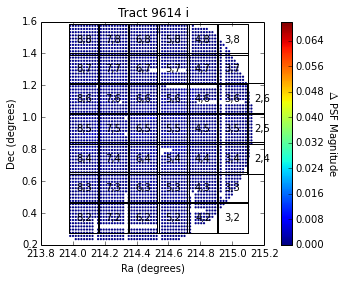

In [339]:
Q = plt.scatter(Xdeg, Ydeg, c=dmag, s=5, norm=pyplot.Normalize(0.0, 0.07),
                edgecolors="none")
cb = plt.colorbar()
cb.ax.get_yaxis().labelpad = 15
cb.set_label('$\Delta$ PSF Magnitude', rotation=270)

plt.axes().set_aspect("equal")
plt.xlim(213.8, 215.2)
plt.ylim(0.2, 1.6)

if byPatch:
    drawPatches(calexpInfo, patches)
else:
    drawCcds(calexpInfo, ccds)

plt.xlabel("Ra (degrees)")
plt.ylabel("Dec (degrees)")
plt.title("%s%s%s %s" % (("Tract %d" % tract) if byPatch else "", 
                         ((" %s" % calexpInfo.keys()[0]) if len(calexpInfo.keys()) == 1 else ""), 
                         (" visit %d" % myVisit if myVisit else ""),
                         filter[-1:].lower()))

plt.savefig('psfFlux%s.pdf' % (("-%d" % myVisit) if myVisit else ""))

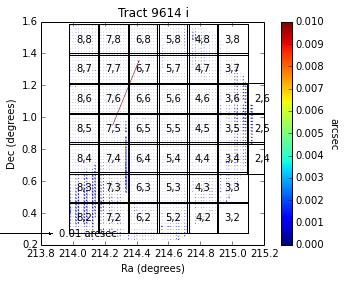

In [340]:
pivot='middle'
width=None # 5e-4
labelLen = 0.005
scale = 5*labelLen                  # larger => smaller arrows

vlen = np.hypot(dx, dy)
good = vlen < 3*labelLen

Q = plt.quiver(Xdeg[good], Ydeg[good], dx[good], dy[good], vlen[good], norm=pyplot.Normalize(0, 2*labelLen),
               #color=plt.cm.jet, 
               units='xy', scale_units='xy',
               width=width, pivot=pivot, scale=scale, 
               edgecolor="none",
               #headlength=1.5, headwidth=2.5, headaxislength=2.25,
               )
cb = plt.colorbar()
cb.ax.get_yaxis().labelpad = 15
cb.set_label('arcsec', rotation=270)
plt.quiverkey(Q, 0.05, 0.05, 2*labelLen, "%g arcsec" % (2*labelLen), coordinates='axes',
              color='black', labelpos='E')

plt.axes().set_aspect("equal")
plt.xlim(213.8, 215.2)
plt.ylim(0.2, 1.6)

if byPatch:
    drawPatches(calexpInfo, patches)
else:
    drawCcds(calexpInfo, ccds)

plt.xlabel("Ra (degrees)")
plt.ylabel("Dec (degrees)")
plt.title("%s%s%s %s" % (("Tract %d" % tract) if byPatch else "",
                             ((" %s" % calexpInfo.keys()[0]) if len(calexpInfo.keys()) == 1 else ""), 
                              (" visit %d" % myVisit if myVisit else ""),
                              filter[-1:].lower()))

plt.savefig('psfOffsets%s.pdf' % (("-%d" % myVisit) if myVisit else ""))